# Centroid Displacement

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import gaussian_kde

In [46]:
data =  pd.read_csv('Hurricanes_Displacement_Study.csv')
data

,Hurricane_Name,Lat_Pass,obs_lat,obs_lon,obs_pres,obs_date,obs_time,F6_lat,F6_lon,F6_pres,...,F18_lat,F18_lon,F18_pres,F24_lat,F24_lon,F24_pres,F30_lat,F30_lon,F30_pres,Land_Influence
0,Gaston,20,19.8,44.0,992,9/25/2016,12,20.00,43.75,987,...,20.00,43.75,995,19.50,43.50,983,19.75,43.75,987,open
1,Gaston,30,29.9,54.5,976,9/28/2016,6,30.00,56.75,988,...,29.75,56.50,979,29.75,56.50,971,29.50,58.00,977,open
2,Matthew,20,20.1,74.3,947,10/4/2016,18,19.25,74.25,953,...,19.25,74.50,951,19.00,74.25,940,19.25,74.50,942,near
3,Matthew,30,29.7,80.7,946,10/7/2016,18,29.75,81.75,966,...,29.50,81.50,955,29.75,81.50,946,29.50,82.00,970,near
4,Maria,20,19.9,68.8,959,9/21/2017,12,20.00,68.75,952,...,19.25,67.50,959,19.50,68.00,948,20.25,68.75,944,near
5,Maria,30,29.7,72.9,947,9/25/2017,0,29.50,73.00,955,...,29.50,73.00,943,29.50,73.25,932,29.50,73.25,923,open
6,Irma,20,20.2,69.0,921,9/7/2017,12,20.25,69.00,949,...,20.50,68.75,945,20.50,69.25,935,21.00,69.00,933,near
7,Florence,20,20.0,42.7,982,9/4/2018,18,20.50,42.50,989,...,20.25,43.50,986,20.00,43.75,986,20.00,44.00,988,open
8,Florence,30,30.4,71.9,949,9/12/2018,18,30.50,72.00,957,...,30.50,72.25,943,30.75,72.25,950,30.50,72.50,948,open
9,Dorian,20,20.0,66.3,988,8/29/2019,6,20.00,66.50,996,...,20.00,66.50,996,20.00,66.75,995,19.00,69.25,1002,near


In [47]:
forecast_hour = [0, 6, 12, 18, 24, 30]

all_hour_lat = []
all_hour_lon = []
all_hour_pre = []

pre_all_avg = []
pre_all_med = []
pre_all_std = []
pre_abs_avg = []

for hour in forecast_hour[1:]:
    locals()[f'f{hour}_lat']=[]
    locals()[f'f{hour}_lon']=[]
    locals()[f'f{hour}_pre']=[]
    locals()[f'f{hour}_abs']=[]
    
    for rid, row in data.iterrows():
        locals()[f'f{hour}_lat'].append(row[f'F{hour}_lat']-row[f'obs_lat'])
        locals()[f'f{hour}_lon'].append(row[f'F{hour}_lon']-row[f'obs_lon'])
        locals()[f'f{hour}_pre'].append(row[f'F{hour}_pres']-row[f'obs_pres'])
        locals()[f'f{hour}_abs'].append(abs(row[f'F{hour}_pres']-row[f'obs_pres']))
        
        all_hour_lat.append(row[f'F{hour}_lat']-row[f'obs_lat'])
        all_hour_lon.append(row[f'F{hour}_lon']-row[f'obs_lon'])
        all_hour_pre.append(row[f'F{hour}_pres']-row[f'obs_pres'])
        
    pre_all_avg.append(np.average(locals()[f'f{hour}_pre']))
    pre_all_med.append(np.median(locals()[f'f{hour}_pre']))
    pre_all_std.append(np.std(locals()[f'f{hour}_pre']))
    pre_abs_avg.append(np.average(locals()[f'f{hour}_abs']))

## Plot All Data!

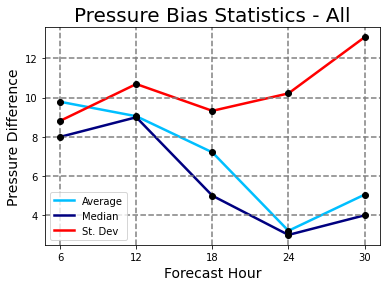

In [49]:
#Plot the data!
plt.plot(forecast_hour[1:], pre_all_avg, color = 'deepskyblue', lw=2.5)
plt.plot(forecast_hour[1:], pre_all_med, color = 'navy', lw=2.5)
plt.plot(forecast_hour[1:], pre_all_std, color = 'red', lw=2.5)
#plt.plot(forecast_hour[1:], pre_abs_avg, color = 'orangered', lw=2.5)

plt.scatter(forecast_hour[1:], pre_all_avg, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], pre_all_med, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], pre_all_std, color = 'k', zorder=10)
#plt.scatter(forecast_hour[1:], pre_abs_avg, color = 'k', zorder=10)

#Clean up the figure!
plt.title('Pressure Bias Statistics - All', size = 20)

plt.xticks(ticks = forecast_hour[1:])
plt.xlabel('Forecast Hour', size = 14)

plt.axvline(x = 6, color = 'grey', ls='--')
plt.axvline(x = 12, color = 'grey', ls='--')
plt.axvline(x = 18, color = 'grey', ls='--')
plt.axvline(x = 24, color = 'grey', ls='--')
plt.axvline(x = 30, color = 'grey', ls='--')

plt.ylabel('Pressure Difference', size = 14)

plt.axhline(y = 4, color = 'grey', ls='--')
plt.axhline(y = 6, color = 'grey', ls='--')
plt.axhline(y = 8, color = 'grey', ls='--')
plt.axhline(y = 10, color = 'grey', ls='--')
plt.axhline(y = 12, color = 'grey', ls='--')

#plt.legend(['Average', 'Median', 'St. Dev', 'Abs. Average'], loc ='lower left')
plt.legend(['Average', 'Median', 'St. Dev'], loc ='lower left')

In [39]:
#Extract x and y
x= all_hour_lon
y= all_hour_lat

#Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

#Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [40]:
#create a smoothing contour of the displacement values.
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [41]:
#find average and median values
x_avg = np.average(x)
y_avg = np.average(y)

x_med = np.median(x)
y_med = np.median(y)

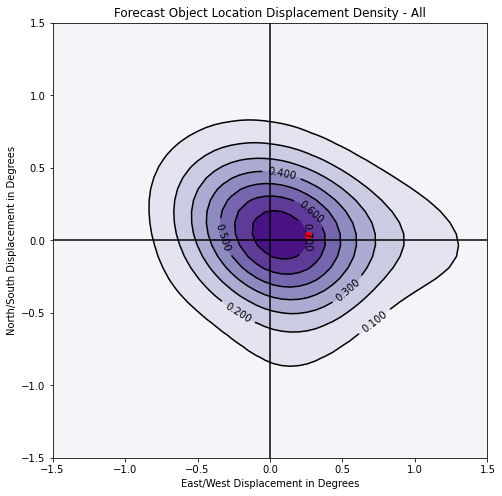

In [42]:
#Create the graph
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
cfset = ax.contourf(xx, yy, f, cmap='Purples')
ax.imshow(np.rot90(f), cmap='Purples', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.scatter(x_avg, y_avg, color='red')

#ax.scatter(x_med, y_med)
ax.set_xlabel('East/West Displacement in Degrees')
ax.set_ylabel('North/South Displacement in Degrees')
plt.title('Forecast Object Location Displacement Density - All')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

## Specific Designations of Hurricanes

### Open Ocean Hurricanes

In [9]:
des_data= data[(data['Land_Influence'] == f'open')]
des_data

,Hurricane_Name,Lat_Pass,obs_lat,obs_lon,obs_pres,obs_date,obs_time,F6_lat,F6_lon,F6_pres,...,F18_lat,F18_lon,F18_pres,F24_lat,F24_lon,F24_pres,F30_lat,F30_lon,F30_pres,Land_Influence
0,Gaston,20,19.8,44.0,992,9/25/2016,12,20.00,43.75,987,...,20.00,43.75,995,19.50,43.50,983,19.75,43.75,987,open
1,Gaston,30,29.9,54.5,976,9/28/2016,6,30.00,56.75,988,...,29.75,56.50,979,29.75,56.50,971,29.50,58.00,977,open
5,Maria,30,29.7,72.9,947,9/25/2017,0,29.50,73.00,955,...,29.50,73.00,943,29.50,73.25,932,29.50,73.25,923,open
7,Florence,20,20.0,42.7,982,9/4/2018,18,20.50,42.50,989,...,20.25,43.50,986,20.00,43.75,986,20.00,44.00,988,open
8,Florence,30,30.4,71.9,949,9/12/2018,18,30.50,72.00,957,...,30.50,72.25,943,30.75,72.25,950,30.50,72.50,948,open
10,Dorian,30,30.1,79.7,960,9/4/2019,18,30.25,79.75,969,...,30.25,80.00,960,30.25,80.00,959,30.25,79.75,959,open
11,Teddy,20,19.7,53.7,948,9/17/2020,18,19.75,53.50,956,...,19.75,53.50,958,19.75,53.25,964,20.00,53.25,968,open
12,Teddy,30,29.7,63.5,962,9/21/2020,6,29.75,63.50,965,...,29.75,63.50,958,29.75,63.25,958,29.75,63.50,958,open
13,Larry,20,20.0,50.3,953,9/5/2021,18,20.00,50.50,965,...,20.25,50.25,968,20.25,50.25,965,20.25,50.50,965,open
14,Larry,30,30.1,60.8,968,9/9/2021,6,30.00,61.00,976,...,30.25,61.00,973,30.25,61.25,973,30.25,61.25,972,open


### Near Land Hurricanes

In [10]:
des_data= data[(data['Land_Influence'] == f'near')]
des_data

,Hurricane_Name,Lat_Pass,obs_lat,obs_lon,obs_pres,obs_date,obs_time,F6_lat,F6_lon,F6_pres,...,F18_lat,F18_lon,F18_pres,F24_lat,F24_lon,F24_pres,F30_lat,F30_lon,F30_pres,Land_Influence
2,Matthew,20,20.1,74.3,947,10/4/2016,18,19.25,74.25,953,...,19.25,74.50,951,19.00,74.25,940,19.25,74.50,942,near
3,Matthew,30,29.7,80.7,946,10/7/2016,18,29.75,81.75,966,...,29.50,81.50,955,29.75,81.50,946,29.50,82.00,970,near
4,Maria,20,19.9,68.8,959,9/21/2017,12,20.00,68.75,952,...,19.25,67.50,959,19.50,68.00,948,20.25,68.75,944,near
6,Irma,20,20.2,69.0,921,9/7/2017,12,20.25,69.00,949,...,20.50,68.75,945,20.50,69.25,935,21.00,69.00,933,near
9,Dorian,20,20.0,66.3,988,8/29/2019,6,20.00,66.50,996,...,20.00,66.50,996,20.00,66.75,995,19.00,69.25,1002,near
17,Fiona,20,20.2,70.1,974,9/20/2022,0,20.50,70.00,975,...,20.50,69.50,980,20.75,70.00,977,20.75,69.75,976,near


In [11]:
desg = ['open', 'near']

pre_all_avg = []
pre_all_med = []
pre_all_std = []
pre_abs_avg = []

for des in desg:
    
    locals()[f'{des}_pre_all_avg'] = []
    locals()[f'{des}_pre_all_med'] = []
    locals()[f'{des}_pre_all_std'] = []
    locals()[f'{des}_pre_abs_avg'] = []
    locals()[f'{des}_lat_dis'] = []
    locals()[f'{des}_lon_dis'] = []
    
    des_data= data[(data['Land_Influence'] == f'{des}')]
    
    for hour in forecast_hour[1:]:

        locals()[f'{des}_pre_dis'] = []
        locals()[f'{des}_abs_dis'] = []
        
        for rid, row in des_data.iterrows():
            locals()[f'{des}_lat_dis'].append(row[f'F{hour}_lat']-row[f'obs_lat'])
            locals()[f'{des}_lon_dis'].append(row[f'F{hour}_lon']-row[f'obs_lon'])
            locals()[f'{des}_pre_dis'].append(row[f'F{hour}_pres']-row[f'obs_pres'])
            locals()[f'{des}_abs_dis'].append(abs(row[f'F{hour}_pres']-row[f'obs_pres']))

        locals()[f'{des}_pre_all_avg'].append(np.average(locals()[f'{des}_pre_dis']))
        locals()[f'{des}_pre_all_med'].append(np.median(locals()[f'{des}_pre_dis']))
        locals()[f'{des}_pre_all_std'].append(np.std(locals()[f'{des}_pre_dis']))
        locals()[f'{des}_pre_abs_avg'].append(np.average(locals()[f'{des}_abs_dis']))

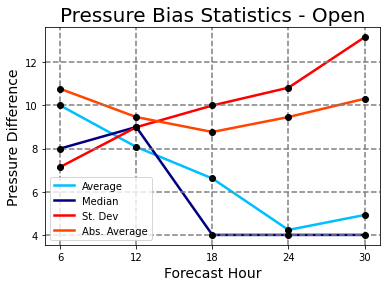

In [12]:
#Plot the data!
plt.plot(forecast_hour[1:], open_pre_all_avg, color = 'deepskyblue', lw=2.5)
plt.plot(forecast_hour[1:], open_pre_all_med, color = 'navy', lw=2.5)
plt.plot(forecast_hour[1:], open_pre_all_std, color = 'red', lw=2.5)
plt.plot(forecast_hour[1:], open_pre_abs_avg, color = 'orangered', lw=2.5)

plt.scatter(forecast_hour[1:], open_pre_all_avg, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], open_pre_all_med, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], open_pre_all_std, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], open_pre_abs_avg, color = 'k', zorder=10)

#Clean up the figure!
plt.title('Pressure Bias Statistics - Open', size = 20)

plt.xticks(ticks = forecast_hour[1:])
plt.xlabel('Forecast Hour', size = 14)

plt.axvline(x = 6, color = 'grey', ls='--')
plt.axvline(x = 12, color = 'grey', ls='--')
plt.axvline(x = 18, color = 'grey', ls='--')
plt.axvline(x = 24, color = 'grey', ls='--')
plt.axvline(x = 30, color = 'grey', ls='--')

plt.ylabel('Pressure Difference', size = 14)

plt.axhline(y = 4, color = 'grey', ls='--')
plt.axhline(y = 6, color = 'grey', ls='--')
plt.axhline(y = 8, color = 'grey', ls='--')
plt.axhline(y = 10, color = 'grey', ls='--')
plt.axhline(y = 12, color = 'grey', ls='--')

plt.legend(['Average', 'Median', 'St. Dev', 'Abs. Average'], loc ='lower left')

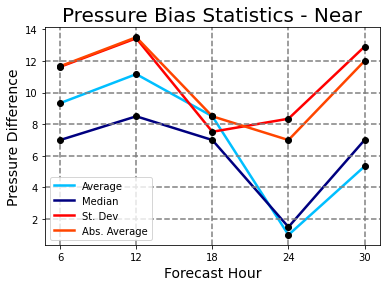

In [13]:
#Plot the data!
plt.plot(forecast_hour[1:], near_pre_all_avg, color = 'deepskyblue', lw=2.5)
plt.plot(forecast_hour[1:], near_pre_all_med, color = 'navy', lw=2.5)
plt.plot(forecast_hour[1:], near_pre_all_std, color = 'red', lw=2.5)
plt.plot(forecast_hour[1:], near_pre_abs_avg, color = 'orangered', lw=2.5)

plt.scatter(forecast_hour[1:], near_pre_all_avg, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], near_pre_all_med, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], near_pre_all_std, color = 'k', zorder=10)
plt.scatter(forecast_hour[1:], near_pre_abs_avg, color = 'k', zorder=10)

#Clean up the figure!
plt.title('Pressure Bias Statistics - Near', size = 20)

plt.xticks(ticks = forecast_hour[1:])
plt.xlabel('Forecast Hour', size = 14)

plt.axvline(x = 6, color = 'grey', ls='--')
plt.axvline(x = 12, color = 'grey', ls='--')
plt.axvline(x = 18, color = 'grey', ls='--')
plt.axvline(x = 24, color = 'grey', ls='--')
plt.axvline(x = 30, color = 'grey', ls='--')

plt.ylabel('Pressure Difference', size = 14)

plt.axhline(y = 4, color = 'grey', ls='--')
plt.axhline(y = 6, color = 'grey', ls='--')
plt.axhline(y = 8, color = 'grey', ls='--')
plt.axhline(y = 10, color = 'grey', ls='--')
plt.axhline(y = 12, color = 'grey', ls='--')
plt.axhline(y = 2, color = 'grey', ls='--')

plt.legend(['Average', 'Median', 'St. Dev', 'Abs. Average'], loc ='lower left')


In [29]:
#Extract x and y
x= open_lon_dis
y= open_lat_dis

#Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

#Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [30]:
#create a smoothing contour of the displacement values.
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [31]:
#find average and median values
x_avg = np.average(x)
y_avg = np.average(y)

x_med = np.median(x)
y_med = np.median(y)

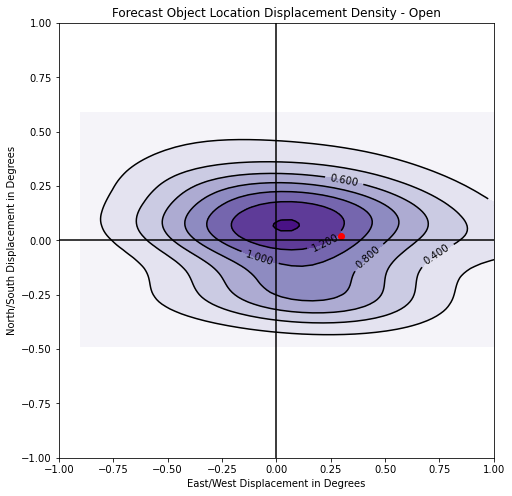

In [32]:
#Create the graph
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
cfset = ax.contourf(xx, yy, f, cmap='Purples')
ax.imshow(np.rot90(f), cmap='Purples', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.scatter(x_avg, y_avg, color='red')

#ax.scatter(x_med, y_med)
ax.set_xlabel('East/West Displacement in Degrees')
ax.set_ylabel('North/South Displacement in Degrees')
plt.title('Forecast Object Location Displacement Density - Open')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

In [33]:
#Extract x and y
x= near_lon_dis
y= near_lat_dis

#Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

#Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [34]:
#create a smoothing contour of the displacement values.
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [35]:
#find average and median values
x_avg = np.average(x)
y_avg = np.average(y)

x_med = np.median(x)
y_med = np.median(y)

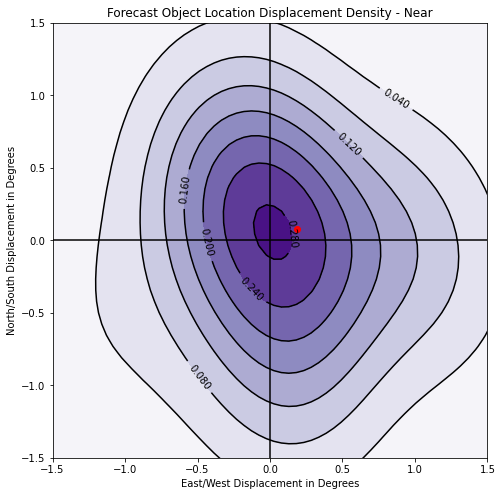

In [37]:
#Create the graph
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
cfset = ax.contourf(xx, yy, f, cmap='Purples')
ax.imshow(np.rot90(f), cmap='Purples', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.scatter(x_avg, y_avg, color='red')

#ax.scatter(x_med, y_med)
ax.set_xlabel('East/West Displacement in Degrees')
ax.set_ylabel('North/South Displacement in Degrees')
plt.title('Forecast Object Location Displacement Density - Near')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')